In [1]:
from functions_paper import *

# READ DATA AND PARAMETER VALUES

In [2]:
#READ DATA
avgdata, stddata=read_data()

#SUFFIX FOR SIMULATIONS
suffix='01_paper'

#PARAMETERS
Temp=[22,28]
Daylength=[0,8,12,16,24]
Daylength2=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4]+list(range(4,25,2))
params=[]
with open('results/parameters_'+suffix+'.txt', 'r') as f:
    for line in f:
        w=line.split()
        params.append(float(w[0]))    

# FIGURE 1
### SIMULATIONS

In [3]:
mutants=['Col', 'cop1-4', 'COP1-OE', 'pif4', 'elf3-8', 'elf3-8_cop1-4',
         'ELF3ox', 'ELF3ox_cop1-4', 'hy5', 'phyB-9', 'PHYBox', 
         'pif4', 'PIF4ox', 'pifq']
hypo_python, tot_python=model_results(Temp,Daylength2,params,mutants)

### WRITE DATA FROM SIMULATIONS

In [ ]:
with pd.ExcelWriter('results/fig1_data.xls') as writer:
    for mut in mutants:
        W=[]
        for (D,T) in itertools.product(Daylength2,Temp):
            key=str(T)+'_'+str(D)
            try:
                W.append([D,T,avgdata[mut][key],stddata[mut][key],hypo_python[mut][key]])
            except:
                W.append([D,T,'NaN','NaN',hypo_python[mut][key]])
        DFdata=pd.DataFrame.from_records(W, columns=['Daylength', 'Temperature', 'Average Growth (experimental)', 'Standard Deviation Growth (experimental)', 'Model prediction'])
        DFdata.to_excel(writer, sheet_name=mut, float_format='%.3f',index=False)

### PLOT SIMULATIONS

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator


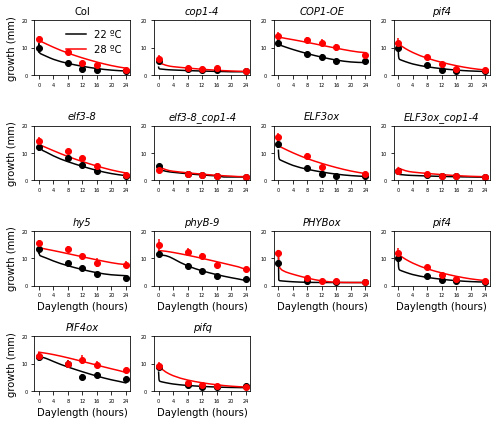

In [4]:
fig=plt.figure(figsize=(7,6))
ncols=4
nrows=4
for i1,mut in enumerate(mutants):
    ax=fig.add_subplot(nrows,ncols,i1+1)
    #PLOT SIMULATIONS PYTHON
    hp22=[]
    hp28=[]
    for D in Daylength2:
        key22='22_'+str(D)
        key28='28_'+str(D)
        hp22.append(hypo_python[mut][key22])
        hp28.append(hypo_python[mut][key28])  
    ax.plot(Daylength2, hp22, 'k', label='22 ºC')
    ax.plot(Daylength2, hp28, 'r', label='28 ºC')
    #DATA
    d22=[]
    d28=[]
    s22=[]
    s28=[]
    for D in Daylength:
        key22='22_'+str(D)
        key28='28_'+str(D)
        if mut in avgdata:
            d22.append(avgdata[mut][key22])
            d28.append(avgdata[mut][key28])
            s22.append(stddata[mut][key22])
            s28.append(stddata[mut][key28])
    if mut in avgdata:
        ax.errorbar(Daylength, d22, yerr=s22, fmt='o', color='k')
        ax.errorbar(Daylength, d28, yerr=s28, fmt='o', color='r')
    if mut=='Col':
        ax.set_title(mut, size=10)
    else:
        ax.set_title(mut, style='italic', size=10)
    ax.set_ylim([0,20])
    if i1==0:
        ax.legend(loc='upper right', frameon=False)
    if i1>7:
        ax.set_xlabel('Daylength (hours)', size=10)
    if i1%4==0:
        ax.set_ylabel('growth (mm)', size=10)
    ax.set_xticks([0,4,8,12,16,20,24])
    ax.set_xticklabels([0,4,8,12,16,20,24], size=5)
    ax.set_yticklabels(ax.get_yticks(), size=5)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
fig.tight_layout()

# SUPP FIGURE 1
### SIMULATE EXTRA MUTANTS

In [5]:
extraM=['hy5', 'elf3-8 phyB', 'phyB cop1-4']
hypo_supp, tot_supp=model_results(Temp,Daylength2,params,extraM)

### WRITE DATA

In [ ]:
with pd.ExcelWriter('results/suppfig1_data.xls') as writer:
    for mut in extraM:
        W=[]
        for (D,T) in itertools.product(Daylength2,Temp):
            key=str(T)+'_'+str(D)
            try:
                W.append([D,T,avgdata[mut][key],stddata[mut][key],hypo_supp[mut][key]])
            except:
                W.append([D,T,'NaN','NaN',hypo_supp[mut][key]])
        DFdata=pd.DataFrame.from_records(W, columns=['Daylength', 'Temperature', 'Average Growth (experimental)', 'Standard Deviation Growth (experimental)', 'Model prediction'])
        DFdata.to_excel(writer, sheet_name=mut, float_format='%.3f',index=False)

### PLOT

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator


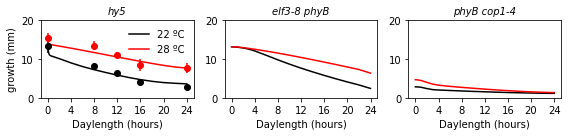

In [6]:
fig=plt.figure(figsize=(8,2))
ncols=len(extraM)
nrows=1
for i1,mut in enumerate(extraM):
    ax=fig.add_subplot(nrows,ncols,i1+1)
    #PLOT SIMULATIONS PYTHON
    hp22=[]
    hp28=[]
    for D in Daylength2:
        key22='22_'+str(D)
        key28='28_'+str(D)
        hp22.append(hypo_supp[mut][key22])
        hp28.append(hypo_supp[mut][key28])  
    ax.plot(Daylength2, hp22, 'k', label='22 ºC')
    ax.plot(Daylength2, hp28, 'r', label='28 ºC')
    #DATA
    d22=[]
    d28=[]
    s22=[]
    s28=[]
    for D in Daylength:
        key22='22_'+str(D)
        key28='28_'+str(D)
        if mut in avgdata:
            d22.append(avgdata[mut][key22])
            d28.append(avgdata[mut][key28])
            s22.append(stddata[mut][key22])
            s28.append(stddata[mut][key28])
    if mut in avgdata:
        ax.errorbar(Daylength, d22, yerr=s22, fmt='o', color='k')
        ax.errorbar(Daylength, d28, yerr=s28, fmt='o', color='r')
    ax.set_title(mut, style='italic', size=10)
    ax.set_ylim([0,20])
    if i1==0:
        ax.legend(loc='upper right', frameon=False)
    if i1>=0:
        ax.set_xlabel('Daylength (hours)', size=10)
    if i1%4==0:
        ax.set_ylabel('growth (mm)', size=10)
    ax.set_xticks([0,4,8,12,16,20,24])
    ax.set_xticklabels([0,4,8,12,16,20,24], size=10)
    ax.set_yticklabels(ax.get_yticks(), size=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
fig.tight_layout()

# FIGURE 2
### PROTEIN DYNAMICS IN SHORT DAY

In [7]:
time=np.linspace(0,120,500)
mut='Col'
B22=tot_python[mut]['22_8'][:,0]
B28=tot_python[mut]['28_8'][:,0]
E22=tot_python[mut]['22_8'][:,1]
E28=tot_python[mut]['28_8'][:,1]
P22=tot_python[mut]['22_8'][:,2]
P28=tot_python[mut]['28_8'][:,2]
C22=tot_python[mut]['22_8'][:,3]
C28=tot_python[mut]['28_8'][:,3]
G22=tot_python[mut]['22_8'][:,4]
G28=tot_python[mut]['28_8'][:,4]

### WRITE RESULTS

In [ ]:
DF=pd.DataFrame({'Time':time, 'phyb22':B22, 'phyb28':B28,
                 'ELF322':E22, 'ELF328':E28, 'PIF422':P22,
                 'PIF428':P28, 'COP122':C22, 'COP128':C28})
DF.to_csv('results/short_day_proteins.csv', float_format='%.3f', index=False)
DF.to_excel('results/short_day_proteins.xls', float_format='%.3f', index=False)

### PLOT

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1

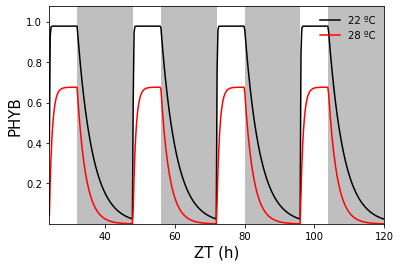

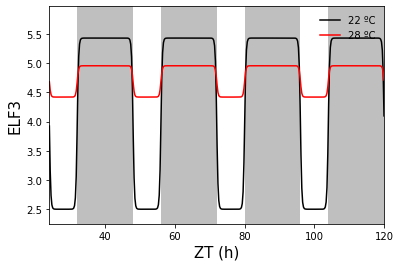

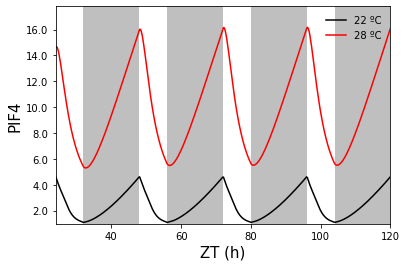

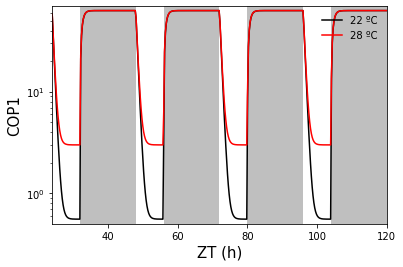

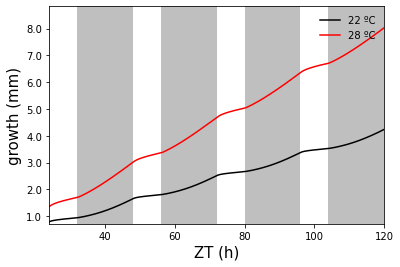

In [8]:
def modsavefigs(time, b22, b28, Daylength, Title):
    xmin=24
    xmax=120
    mask=(time>=xmin) & (time<=xmax)
    Time=time[mask]
    B22=b22[mask]
    B28=b28[mask]
    fig=plt.figure()
    ax=plt.gca()
    ax.plot(Time,B22,'k', label='22 ºC')
    ax.plot(Time,B28,'r', label='28 ºC')
    for days in range(0,5):
        time_day=np.linspace(days*24+Daylength,(days*24)+24, 100)
        ax.fill_between(time_day, 0, 10000, facecolor='grey', alpha=0.5)
    ax.set_ylim([0.9*min(min(B22),min(B28)), 1.10*max(max(B22),max(B28))])
    ax.set_xlabel('ZT (h)', size=15)
    ax.set_ylabel(Title, size=15)
    ax.set_xticklabels(ax.get_xticks(), size=10)
    ax.set_yticklabels(ax.get_yticks(), size=10)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.legend(loc='upper right',frameon=False)
    ax.set_xlim([xmin, xmax])
    if Title=='COP1':
        ax.set_yscale('log')
    #fig.savefig('figures/fig2_'+Title+'_'+suffix+'.pdf', bbox_inches='tight')
modsavefigs(time, B22, B28, 8, 'PHYB')
modsavefigs(time, E22, E28, 8, 'ELF3')
modsavefigs(time, P22, P28, 8, 'PIF4')
modsavefigs(time, C22, C28, 8, 'COP1')
modsavefigs(time, G22, G28, 8, 'growth (mm)')

# SUPPFIG 2
### PROTEIN DYNAMICS IN LONG DAY

In [9]:
time=np.linspace(0,120,500)
B22=tot_python['Col']['22_16'][:,0]
B28=tot_python['Col']['28_16'][:,0]
E22=tot_python['Col']['22_16'][:,1]
E28=tot_python['Col']['28_16'][:,1]
P22=tot_python['Col']['22_16'][:,2]
P28=tot_python['Col']['28_16'][:,2]
C22=tot_python['Col']['22_16'][:,3]
C28=tot_python['Col']['28_16'][:,3]
G22=tot_python['Col']['22_16'][:,4]
G28=tot_python['Col']['28_16'][:,4]

### WRITE RESULTS

In [ ]:
DF=pd.DataFrame({'Time':time, 'phyb22':B22, 'phyb28':B28,
                 'ELF322':E22, 'ELF328':E28, 'PIF422':P22,
                 'PIF428':P28, 'COP122':C22, 'COP128':C28})
DF.to_csv('results/long_day_proteins.csv', float_format='%.3f', index=False)
DF.to_excel('results/long_day_proteins.xls', float_format='%.3f', index=False)

### PLOT

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1

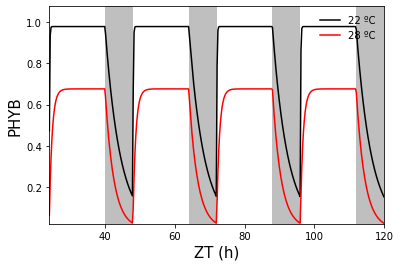

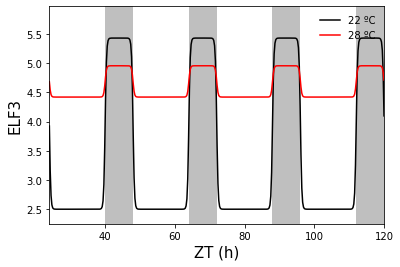

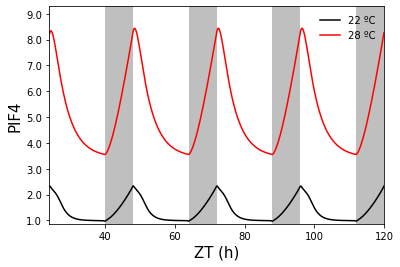

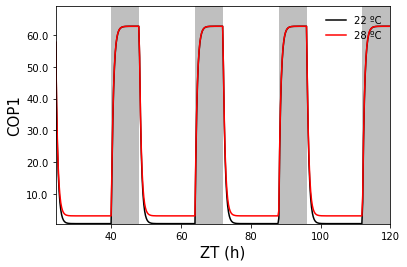

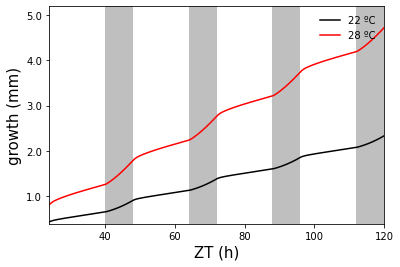

In [10]:
def modsavefigs(time, b22, b28, Daylength, Title):
    xmin=24
    xmax=120
    mask=(time>=xmin) & (time<=xmax)
    Time=time[mask]
    B22=b22[mask]
    B28=b28[mask]
    fig=plt.figure()
    ax=plt.gca()
    ax.plot(Time,B22,'k', label='22 ºC')
    ax.plot(Time,B28,'r', label='28 ºC')
    for days in range(0,5):
        time_day=np.linspace(days*24+Daylength,(days*24)+24, 100)
        ax.fill_between(time_day, 0, 10000, facecolor='grey', alpha=0.5)
    ax.set_ylim([0.9*min(min(B22),min(B28)), 1.10*max(max(B22),max(B28))])
    ax.set_xlabel('ZT (h)', size=15)
    ax.set_ylabel(Title, size=15)
    ax.set_xticklabels(ax.get_xticks(), size=10)
    ax.set_yticklabels(ax.get_yticks(), size=10)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.legend(loc='upper right',frameon=False)
    ax.set_xlim([xmin, xmax])
    #fig.savefig('figures/SUPPfig2_'+Title+'_'+suffix+'.pdf', bbox_inches='tight')
modsavefigs(time, B22, B28, 16, 'PHYB')
modsavefigs(time, E22, E28, 16, 'ELF3')
modsavefigs(time, P22, P28, 16, 'PIF4')
modsavefigs(time, C22, C28, 16, 'COP1')
modsavefigs(time, G22, G28, 16, 'growth (mm)')

# FIGURE 3

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4

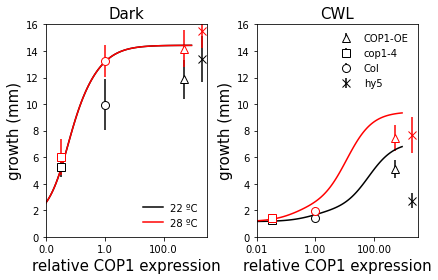

In [11]:
DF=pd.read_csv('results/effect_of_cop1_'+suffix+'.csv')
fig=plt.figure()
#DARK
ax=fig.add_subplot(1,2,1)
DFd=DF[DF['D']==0]
TC=['k', 'r']
COP1m=['COP1-OE', 'cop1-4', 'Col', 'hy5']
COP1ex=[params[28], params[29],  1.0, 2000]
SL=['^', 's', 'o', 'x', '^']
for t1,t in enumerate([22,28]):
    DFc=DFd[DFd['T']==t]
    ax.plot(DFc['COP1'], DFc['Growth'], color=TC[t1], label=str(t)+' ºC')
    ax.set_xscale('log')
    ax.set_xlim([0.01,3000])
    ax.set_ylim([0,16])
    ax.set_xlabel('relative COP1 expression', size=15)
    ax.set_ylabel('growth (mm)', size=15)
    ax.set_xticklabels(ax.get_xticks(), size=10)
    ax.set_yticklabels(ax.get_yticks(), size=10)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.set_title('Dark', fontsize=15)
    ax.legend(loc='lower right', frameon=False)
    #PLOT MUTANTS
    for c1,c in enumerate(COP1m):
        sT=str(t)
        y=avgdata[COP1m[c1]][sT+'_0']
        yerr=stddata[COP1m[c1]][sT+'_0']
        ax.errorbar(COP1ex[c1],y,yerr=yerr,fmt=SL[c1],color='w', markersize=8,ecolor=TC[t1],markeredgecolor=TC[t1])
#LIGHT
ax=fig.add_subplot(1,2,2)
DFd=DF[DF['D']==24]
TC=['k', 'r']
for t1,t in enumerate([22,28]):
    DFc=DFd[DFd['T']==t]
    ax.plot(DFc['COP1'], DFc['Growth'], color=TC[t1], label='_nolegend_')
    ax.set_xscale('log')
    ax.set_xlim([0.01,3000])
    ax.set_ylim([0,16])
    ax.set_xlabel('relative COP1 expression', size=15)
    ax.set_ylabel('growth (mm)', size=15)
    ax.set_xticklabels(ax.get_xticks(), size=10)
    ax.set_yticklabels(ax.get_yticks(), size=10)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.set_title('CWL', fontsize=15)
    #PLOT MUTANTS
    for c1,c in enumerate(COP1m):
        sT=str(t)
        y=avgdata[COP1m[c1]][sT+'_24']
        yerr=stddata[COP1m[c1]][sT+'_24']
        if t==22:
            ax.errorbar(COP1ex[c1],y,yerr=yerr,fmt=SL[c1],color='w',markersize=8,ecolor=TC[t1],markeredgecolor=TC[t1],label=c)
        else:
            ax.errorbar(COP1ex[c1],y,yerr=yerr,fmt=SL[c1],color='w',markersize=8,ecolor=TC[t1],markeredgecolor=TC[t1])
    ax.legend(frameon=False)
fig.tight_layout()

# SUPPFIG 5
## PLOT DATA USED FOR FITTING THE MODEL
### GROWTH DATA

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3

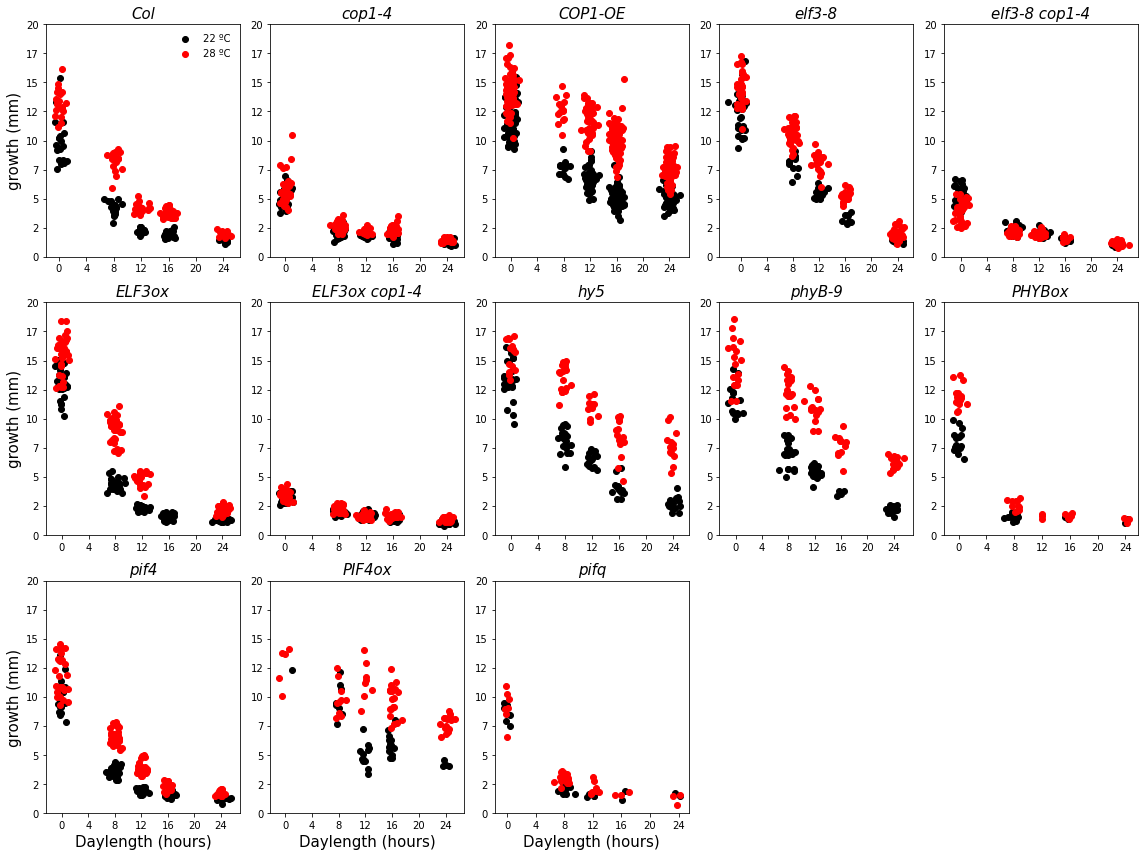

In [12]:
DF=pd.read_csv('data/daylength_def.csv')
mutants=sorted(get_key(DF,'Genotype'),key=str.casefold)
mutants.remove('lux')
mutants.remove('elf4')
mutants.remove('det1-1')
fig=plt.figure(figsize=(16,12))
maxcols=5
maxrows=int(np.ceil(len(mutants)/maxcols))
for i,mut in enumerate(mutants):
    ax=fig.add_subplot(maxrows,maxcols,i+1)
    M=DF[DF.Genotype==mut]
    TC=['k','r']
    for t1,T in enumerate([22,28]):
        MT=M[M.Temperature==T]
        D=MT.Daylength+np.random.normal(0,0.5, len(MT))
        G=MT.Growth
        ax.scatter(D,G,color=TC[t1],label=str(T)+' ºC')
    from collections import OrderedDict
    handles, labels = ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    if i==0:
        ax.legend(by_label.values(), by_label.keys(),loc='upper right', frameon=False)
    ax.set_title(mut, style='italic', size=15)
    ax.set_ylim([0,20])
    if i>=10:
        ax.set_xlabel('Daylength (hours)', size=15)
    else:
        ax.set_xlabel('')
    if i%5==0:
        ax.set_ylabel('growth (mm)', size=15)
    else:
        ax.set_ylabel('')
    ax.set_xticks([0,4,8,12,16,20,24])
    ax.set_xticklabels(ax.get_xticks(), size=10)
    ax.set_yticklabels(ax.get_yticks(), size=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
fig.tight_layout()

### EXPRESSION DATA

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator


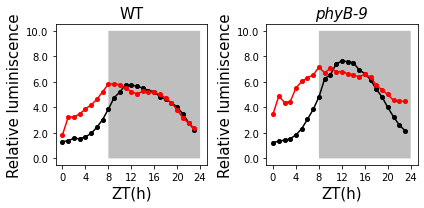

In [13]:
EX=pd.read_csv('data/expression_def.csv', sep='\t')
T=np.arange(0,24,1)
T2=np.arange(0,24,0.001)
fig=plt.figure(figsize=(6,3))
#COL DATA
ax=fig.add_subplot(1,2,1)
ax.plot(T,EX['Col 22'], 'o-k', label='22 ºC', markersize=4)
ax.plot(T,EX['Col 28'], 'o-r', label='28 ºC', markersize=4)
D=np.heaviside(T2-8,0)
ax.fill_between(T2,0*D,10*D,facecolor='grey', alpha=0.5)
ax.set_title('WT', size=15)
ax.set_xticks([0,4,8,12,16,20,24])
ax.set_xticklabels(ax.get_xticks(), size=10)
ax.set_yticklabels(ax.get_yticks(), size=10)
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_xlabel('ZT(h)', size=15)
ax.set_ylabel('Relative luminiscence', size=15)
#phyB DATA
ax=fig.add_subplot(1,2,2)
ax.plot(T,EX['phyB 22'], 'o-k', label='22 ºC', markersize=4)
ax.plot(T,EX['phyB 28'], 'o-r', label='28 ºC', markersize=4)
D=np.heaviside(T2-8,0)
ax.fill_between(T2,0*D,10*D,facecolor='grey', alpha=0.5)
ax.set_title('phyB-9', style='italic', size=15)
ax.set_xticks([0,4,8,12,16,20,24])
ax.set_xticklabels(ax.get_xticks(), size=10)
ax.set_yticklabels(ax.get_yticks(), size=10,)
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_xlabel('ZT(h)', size=15)
ax.set_ylabel('Relative luminiscence',  size=15)
fig.tight_layout()

# SUPPFIG1 (VIOLIN PLOT)

In [ ]:
DF=pd.read_csv('data/daylength_def.csv')
mutants=sorted(get_key(DF,'Genotype'),key=str.casefold)
mutants.remove('lux')
mutants.remove('elf4')
mutants.remove('det1-1')

fig=plt.figure(figsize=(16,12))
maxcols=5
maxrows=int(np.ceil(len(mutants)/maxcols))
for i,mut in enumerate(mutants):
    ax=fig.add_subplot(maxrows,maxcols,i+1)
    M=DF[DF.Genotype==mut]
    TC=['k','r']
    TP=['binary', 'Reds']
    D=M.Daylength
    G=M.Growth
    ax1=sns.violinplot(x='Daylength', y='Growth', hue='Temperature', 
                       data=M, palette=sns.color_palette(['darkgrey','r'], desat=0.5))
    if i>0:
        ax1.get_legend().remove()#ax1.legend()
    if mut=='Col':
        ax.set_title('WT', size=15)
    else:
        ax.set_title(mut, style='italic', size=15)
    ax.set_ylim([0,20])
    if i>=10:
        ax.set_xlabel('Daylength (hours)', size=15)
    else:
        ax.set_xlabel('')
    if i%5==0:
        ax.set_ylabel('growth (mm)', size=15)
    else:
        ax.set_ylabel('')
fig.tight_layout()

In [ ]:

#%%SUPPFIG DATA FOR FITTING VIOLINPLOT
DF=pd.read_csv(dir+'data/daylength_def.csv')
mutants=sorted(get_key(DF,'Genotype'),key=str.casefold)
mutants.remove('lux')
mutants.remove('elf4')
mutants.remove('det1-1')
fig=plt.figure(figsize=(16,12))
maxcols=5
maxrows=int(np.ceil(len(mutants)/maxcols))
mutants=['PIF4ox', 'phyB']
for i,mut in enumerate(mutants):
    ax=fig.add_subplot(maxrows,maxcols,i+1)
    M=DF[DF.Genotype==mut]
    TC=['k','r']
    TP=['Greys', 'Reds']
#    for t1,T in enumerate([22,28]):
#        MT=M[M.Temperature==T]
    D=M.Daylength
    G=M.Growth
    ax1=sns.violinplot(x='Daylength', y='Growth', hue='Temperature', 
                       data=M, palette=sns.color_palette(['grey','r'], desat=0.5),
                       scale='count')#, linewidth=1)
    
    #PLOT SIMULATIONS PYTHON
    hp22=[]
    hp28=[]
    for D in Daylength2:
        key22='22_'+str(D)
        key28='28_'+str(D)
        hp22.append(hypo_python[mut][key22])
        hp28.append(hypo_python[mut][key28])  
    ax.plot(Daylength2, hp22, 'k', label='22 ºC')
    ax.plot(Daylength2, hp28, 'r', label='28 ºC')
#    from collections import OrderedDict
#    handles, labels = ax.get_legend_handles_labels()
#    by_label = OrderedDict(zip(labels, handles))
#    if i==0:
#        ax.legend(by_label.values(), by_label.keys(),loc='upper right', prop=prop, frameon=False)
    if mut=='Col':
        ax.set_title(mut, size=15)
    else:
        ax.set_title(mut, style='italic', size=15)
    ax.set_ylim([0,20])
    if i>=10:
        ax.set_xlabel('Daylength (hours)', fontproperties=prop, size=15)
    else:
        ax.set_xlabel('')
    if i%5==0:
        ax.set_ylabel('growth (mm)', fontproperties=prop, size=15)
    else:
        ax.set_ylabel('')
#    ax.set_xticks([0,4,8,12,16,20,24])
#    ax.set_xticklabels(ax.get_xticks(), size=10, fontproperties=prop)
#    ax.set_yticklabels(ax.get_yticks(), size=10, fontproperties=prop)
#    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
fig.tight_layout()
fig.savefig('figures/suppfig_data_growth_'+suffix+'_violin_'+str(mutants)+'.pdf', bbox_inches='tight')
